In [8]:
import os
import json
from pathlib import Path

benchmark_path = Path("../target/criterion")
maps_paths = list(map(lambda p: benchmark_path / Path(p), filter(lambda n: n != "report", os.listdir(benchmark_path))))
os.listdir()

methods = ["dijkstra", "dijkstra_fibonacci", "fast_sssp_sequential"]


# {map_name: {method_name: {metric_name: value}}}

def load_json(filename: Path) -> dict:
    with open(filename) as f:
        return json.load(f)


data = {
    m.name: {method: load_json(m / Path(method) / Path("new/estimates.json")) for method in methods}
    for m in maps_paths
}
data


{'monaco.osm': {'dijkstra': {'mean': {'confidence_interval': {'confidence_level': 0.95,
     'lower_bound': 25268095.995125,
     'upper_bound': 25365615.452375002},
    'point_estimate': 25314773.93,
    'standard_error': 24942.09495966167},
   'median': {'confidence_interval': {'confidence_level': 0.95,
     'lower_bound': 25249239.5,
     'upper_bound': 25330416.75},
    'point_estimate': 25284942.75,
    'standard_error': 19174.687563237752},
   'median_abs_dev': {'confidence_interval': {'confidence_level': 0.95,
     'lower_bound': 80237.7546004951,
     'upper_bound': 199201.02051347494},
    'point_estimate': 123055.79781532288,
    'standard_error': 31105.492148531277},
   'slope': None,
   'std_dev': {'confidence_interval': {'confidence_level': 0.95,
     'lower_bound': 127637.79682434397,
     'upper_bound': 221186.72842076185},
    'point_estimate': 177973.90802124536,
    'standard_error': 24136.549225720348}},
  'dijkstra_fibonacci': {'mean': {'confidence_interval': {'conf

In [23]:
from typing import Any

pairs = [
    ("jan_mayen", 50),
    ("gibraltar", 50),
    ("monaco", 50),
    ("san_marino", 25),
    ("andorra", 25),
    ("gotland", 25),
    ("malta", 25),
    ("reykjavik", 25),
    ("budapest", 25),
    ("luxembourg", 25),
    ("haiti", 10),
    ("iceland", 10),
    ("stockholm", 10),
    ("missisippi", 10),
    ("peru", 5),
    ("sweden", 5),
]


def normalize_recursive(item: Any, pair_count: int) -> Any:
    if isinstance(item, dict):
        return {k: (normalize_recursive(v, pair_count) if k != "confidence_level" else v) for k, v in item.items()}
    if isinstance(item, list):
        return [normalize_recursive(i, pair_count) for i in item]
    if isinstance(item, (float, int)):
        return item / pair_count
    return item


normalized_data = {area: normalize_recursive(data[area + ".osm"], pair_count) for area, pair_count in pairs}
normalized_data


{'jan_mayen': {'dijkstra': {'mean': {'confidence_interval': {'confidence_level': 0.95,
     'lower_bound': 97873.37177715806,
     'upper_bound': 98935.27216672953},
    'point_estimate': 98280.78199892111,
    'standard_error': 289.4307634372088},
   'median': {'confidence_interval': {'confidence_level': 0.95,
     'lower_bound': 97822.66699999999,
     'upper_bound': 98248.75835034013},
    'point_estimate': 97919.45136363637,
    'standard_error': 111.05608401077751},
   'median_abs_dev': {'confidence_interval': {'confidence_level': 0.95,
     'lower_bound': 369.8798834674991,
     'upper_bound': 867.6963228169218},
    'point_estimate': 584.9216956155582,
    'standard_error': 124.04664292182484},
   'slope': {'confidence_interval': {'confidence_level': 0.95,
     'lower_bound': 97894.99783065224,
     'upper_bound': 100263.66592419732},
    'point_estimate': 98753.36419941759,
    'standard_error': 663.1466993298283},
   'std_dev': {'confidence_interval': {'confidence_level': 0.95

In [21]:
print(normalized_data["jan_mayen"])

{'dijkstra': {'mean': {'confidence_interval': {'confidence_level': 0.95, 'lower_bound': 97873.37177715806, 'upper_bound': 98935.27216672953}, 'point_estimate': 98280.78199892111, 'standard_error': 289.4307634372088}, 'median': {'confidence_interval': {'confidence_level': 0.95, 'lower_bound': 97822.66699999999, 'upper_bound': 98248.75835034013}, 'point_estimate': 97919.45136363637, 'standard_error': 111.05608401077751}, 'median_abs_dev': {'confidence_interval': {'confidence_level': 0.95, 'lower_bound': 369.8798834674991, 'upper_bound': 867.6963228169218}, 'point_estimate': 584.9216956155582, 'standard_error': 124.04664292182484}, 'slope': {'confidence_interval': {'confidence_level': 0.95, 'lower_bound': 97894.99783065224, 'upper_bound': 100263.66592419732}, 'point_estimate': 98753.36419941759, 'standard_error': 663.1466993298283}, 'std_dev': {'confidence_interval': {'confidence_level': 0.95, 'lower_bound': 521.2218586968972, 'upper_bound': 3416.4630902554163}, 'point_estimate': 2061.471

In [31]:
graph_data = {
    "jan_mayen": {"edges": 29786, "nodes": 13230},
    "gibraltar": {"edges": 100284, "nodes": 44639},
    "monaco": {"edges": 72318, "nodes": 32492},
    "san_marino": {"edges": 341976, "nodes": 154249},
    "andorra": {"edges": 1043844, "nodes": 449273},
    "gotland": {"edges": 1634818, "nodes": 725852},
    "malta": {"edges": 1818642, "nodes": 734962},
    "reykjavik": {"edges": 2241396, "nodes": 1051160},
    "budapest": {"edges": 5187404, "nodes": 2443154},
    "luxembourg": {"edges": 10664130, "nodes": 3916210},
    "haiti": {"edges": 17186498, "nodes": 8497106},
    "iceland": {"edges": 21055604, "nodes": 10350896},
    "stockholm": {"edges": 16459816, "nodes": 7307104},
    "missisippi": {"edges": 21372374, "nodes": 10464418},
    "peru": {"edges": 76084784, "nodes": 37194932},
    "sweden": {"edges": 220005662, "nodes": 98808100},
}
normalized_data_with_graph = {
    area: {"methods": normalized_data[area], "graph": graph_data[area]} for area, v in normalized_data.items()
}
normalized_data_with_graph["jan_mayen"]["graph"]


{'edges': 29786, 'nodes': 13230}

In [41]:
import matplotlib.pyplot as plt
import numpy as np

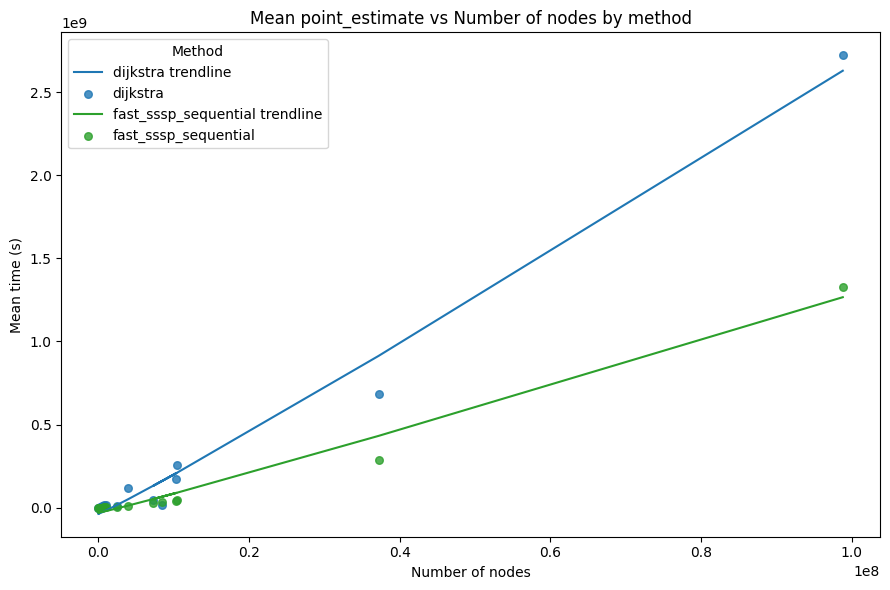

In [66]:
plt.figure(figsize=(9, 6))
colors = {"dijkstra": "C0", "dijkstra_fibonacci": "C1", "fast_sssp_sequential": "C2"}
filtered_methods = [m for m in methods if m != "dijkstra_fibonacci"]
for method in filtered_methods:
    x = [normalized_data_with_graph[a]["graph"]["nodes"] for a in normalized_data_with_graph]
    y = [normalized_data_with_graph[a]["methods"][method]["mean"]["point_estimate"] for a in normalized_data_with_graph]
    nlogn = x*np.log(x)
    trendline = np.polyfit(nlogn, y, 1)
    p = np.poly1d(trendline)
    plt.plot(x, p(nlogn), label=f"{method} trendline", c=colors.get(method, None))
    plt.scatter(x, y, label=method, s=30, alpha=0.8, c=colors.get(method, None))

plt.xlabel("Number of nodes")
plt.ylabel("Mean time (s)")
plt.title("Mean point_estimate vs Number of nodes by method")
plt.legend(title="Method")
# plt.xscale("log")
# Add a trendline
plt.tight_layout()
plt.show()
